**Credits:** *Alessio Desogus*

-------
# CS 401 - Applied Data Analysis 2023
-------

## Initialisation of the Notebook

### Imports

In [ ]:
# Data Manipulation Libraries
import pickle
import pandas as pd
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import math
from collections import Counter
from os import listdir
import os, codecs, string, random
from numpy.random import randint

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date, time
from dateutil.parser import parse
from pandas.plotting import scatter_matrix
from tqdm.notebook import tqdm

# Web parsing Libraries
import requests
from bs4 import BeautifulSoup

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

# NLP Libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from gensim.models.phrases import Phrases
import re

# Statistics
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import kstest
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_classif
import itertools

# Graphs
import networkx as nx
from operator import itemgetter
from community import community_louvain
import collections
from networkx.algorithms.community.centrality import girvan_newman

# Big Data Libraries
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext

### Read Files

#### File Path

In [ ]:
DATA_FOLDER = 'Data/'
HAPPINESS_DATASET = DATA_FOLDER + "happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER + "countries_info.csv"

####  .CSV 

In [ ]:
import pandas as pd

happiness = pd.read_csv(HAPPINESS_DATASET)
happiness.head()

countries = pd.read_csv(COUNTRIES_DATASET, decimal=',')
countries.head()

#### .JSON

#### .TXT

In [ ]:
import json
import pandas as pd

tweets_data_path = './Data/twitter_data.txt'
tweets_data = []

with open(tweets_data_path, "r") as tweets_file:
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

In [ ]:
tweets = pd.DataFrame()

fields = ['text','lang']
for f in fields:
    tweets[f] = list(map(lambda tweet: tweet[f], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
tweets['time_zone'] = list(map(lambda tweet: tweet['user']['time_zone'], tweets_data))

tweets['text_len'] = list(map(lambda tweet: len(tweet), tweets['text']))

print('We got',len(tweets_data),'tweets.')

We got 10698 tweets.


#### .EXCEL

In [ ]:
commune_pop = pd.read_excel(DATA_FOLDER +'communes_pop.xls', skiprows=5, skipfooter=7, sheet_name='2017',
                            names=['commune','population_Jan','population_Dec','variation_num'])

In [ ]:
titanic = pd.read_excel('data/titanic.xls')

### Comment command

<span style="color:royalblue"> 
        Command to make comments distinguishable
</span>

<span style="color:royalblue">    
    
</span>

## 00 - Intro to Tools

### Jupyter Notebooks Features

It is possible to use **bold**, *itallic*, and `verbatim`.

### Built-in Help

In [ ]:
np.linspace?

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7f927ee9d940>
File:            ~/anaconda3/envs/ada/lib/python3.9/site-packages/numpy/core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end

The following let's you get even more information and look a the source code.

In [ ]:
np.linspace??

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7f927ee9d940>
File:            ~/anaconda3/envs/ada/lib/python3.9/site-packages/numpy/core/function_base.py
Source:         
@array_function_dispatch(_linspace_dispatcher)
def linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None,
             axis=0):
    """
    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].

    The endpoint of the interval can optionally be excluded.

    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.

    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior

### Runtime Command

One can for example use the `%timeit` magic to compare the runtime of two pieces of code. For example, let's compare a pure Python recursive implementation of the factorial to an implementation using numpy vector routines.

In [ ]:
%timeit factorial_1(100)

18.4 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%timeit factorial_2(100)

6.34 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Latex Equations 

IPython notebooks allow to display equations just by typing in latex. For example, we can write the famous Fourier transform equation as
$$
\int_{-\infty}^\infty f(t) e^{-i\omega t} dt.
$$

It is also possible to add some math in text, for example  a linear system $Ax = b$.

### Images

It is possible to include images in the notebooks, either by adding the HTML tags directly in a markdown cell such as the following:

<img src="https://www.epfl.ch/campus/services/communication/wp-content/uploads/2019/03/EPFL-Corp-ID-New-Visual-Identity-Logo.png" width=400>

or by using an IPython widget.

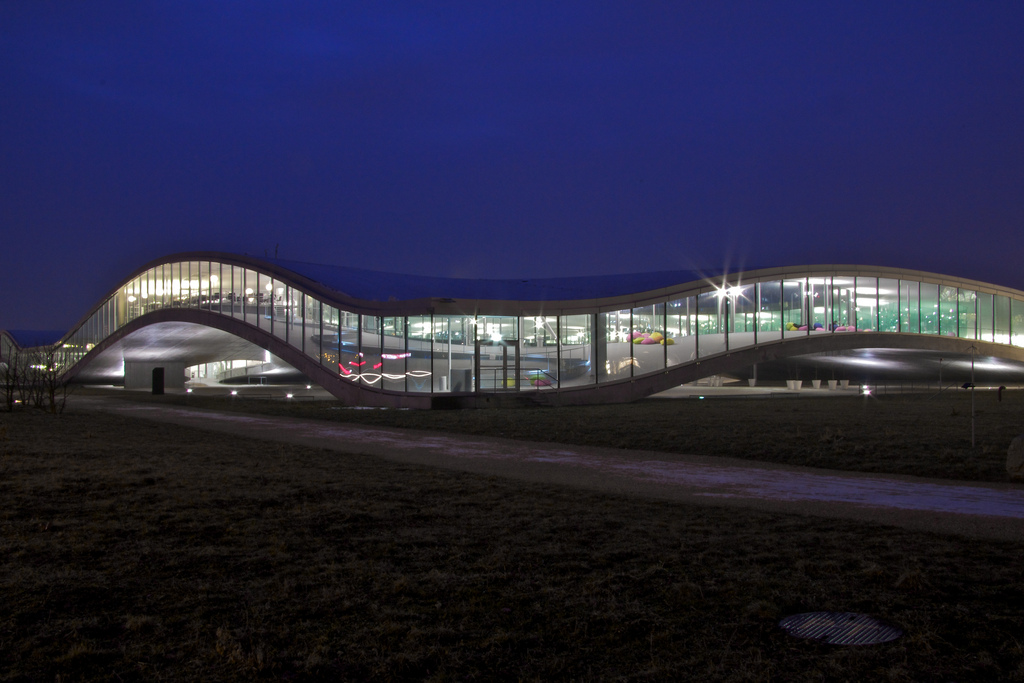

In [ ]:
from IPython.display import Image
# Photos credit: https://commons.wikimedia.org/wiki/File:Rolex_Learning_center.jpg
Image('./Data/rlc.jpg', width=800,height=600)

### Regexp Function (Regular Expression Operations)

In [ ]:
import re

# a helper function to apply the regexp
def word_in_text(words, text):
    words = re.sub('s+','s*', '|'.join(words))
    text = text.lower()
    match = re.search(words, text)
    if match:
        return True
    return False

In [ ]:
print(word_in_text(['open science','epfl'],'open science at epfl is great'))
print(word_in_text(['open science','epfl'],'open science is great'))
print(word_in_text(['open science','epfl'],'science is great'))

True
True
False


In [ ]:
# actually apply the regexp
keywords = ['open access', 'open science', 'ipython', 'open data', 'reproducible research','epfl']
for w in keywords:
    tweets[w] = tweets['text'].apply(lambda tweet: word_in_text([w], tweet))
    
tweets_by_kw = pd.Series([tweets[w].value_counts()[True] for w in keywords], index=keywords)

## 01 - Handling Data

### Merging the Data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

In [ ]:
happiness['country_name'] = happiness['country'].apply(lambda r: r.lower())
country_features = happiness.merge(countries, on="country_name").drop("country_name", axis=1)
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


In [ ]:
print("happiness = {}".format(len(happiness)))
print("countries = {}".format(len(countries)))
print("country_features = {}".format(len(country_features)))

len(happiness) == len(countries) == len(country_features)

happiness = 135
countries = 135
country_features = 135


True

### Sorting the Data

Print the top 10 countries based on their happiness score (higher is better).

In [ ]:
country_features.sort_values("happiness_score", ascending=False)[['country', 'happiness_score']].head(10)

,country,happiness_score
38,Finland,7.8087
31,Denmark,7.6456
115,Switzerland,7.5599
50,Iceland,7.5045
92,Norway,7.4880
87,Netherlands,7.4489
114,Sweden,7.3535
88,New Zealand,7.2996
6,Austria,7.2942
72,Luxembourg,7.2375


### Grouping the Data

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [ ]:
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean','size'])
average_by_region.sort_values("mean", ascending=False)

,mean,size
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


### Printing the Data

Print the names of the countries with a level of literacy of 100%. For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [ ]:
for idx, row in country_features[country_features.literacy==100].iterrows():
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score))

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


Print the raw number and the percentage of world population that is illiterate.

In [ ]:
illiterate_people = country_features.population * (100 - country_features.literacy)/100
illiterate_fraction = illiterate_people.sum() / country_features.population.sum()

print("Illiterate people: {:.0f} ({:.2%})".format(illiterate_people.sum(), illiterate_fraction))

Illiterate people: 1249372988 (20.33%)


### Plotting the Data

Plot in a scatter plot the happiness score (x) and healthy life expectancy (y).

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

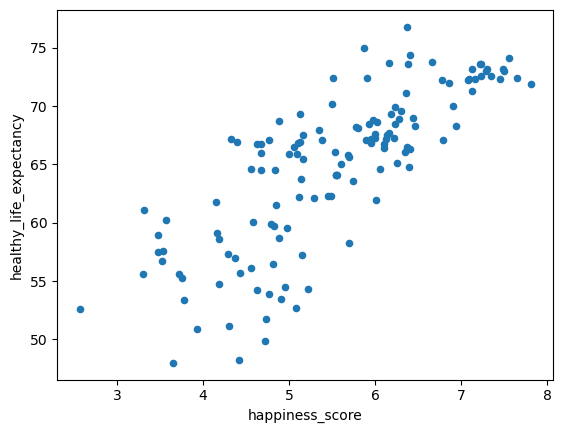

In [ ]:
country_features.plot(x="happiness_score", y="healthy_life_expectancy", kind="scatter")

## 02 - Data Visualisation and Data from the Web

### Data from the Web

#### Web Scraping Libraries

To fetch data from the Web with Python, you need to get use to two essential libraries:

 * [`Requests (HTTP)`](https://requests.kennethreitz.org/en/master/): get the `html` page to parse.

 * [`Beautiful Soup (HTML Parsing)`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): parse the `html` and extract data.

In [ ]:
# Import libraries
import requests # conda install requests
from bs4 import BeautifulSoup # conda install beautifulsoup4

#### Make a `get` Request

##### 1. Get Request Basics

The [GET method](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) retrieves information from the server.

In [ ]:
# Make the request
r = requests.get('https://httpbin.org/ip') # /ip: Returns the requester's IP Address.

print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))
print('Response body: {0}'.format(r.text))

Response status code: 200

Response headers: {'Date': 'Sat, 07 Oct 2023 13:17:26 GMT', 'Content-Type': 'application/json', 'Content-Length': '31', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

Response body: {
  "origin": "92.107.64.67"
}



##### 2. Parsing JSON String from the Response

If the body of the response is a JSON string, Requests offers a convenient way to parse the text and get a Python dictionary.

In [ ]:
r = requests.get('http://worldtimeapi.org/api/timezone/Europe/Zurich')

print('Response body (parsed json):')
r.json()

Response body (parsed json):


{'abbreviation': 'CEST',
 'client_ip': '2a02:1210:7a5f:2c00:dda5:6d7b:1e94:5657',
 'datetime': '2023-10-07T15:19:49.373423+02:00',
 'day_of_week': 6,
 'day_of_year': 280,
 'dst': True,
 'dst_from': '2023-03-26T01:00:00+00:00',
 'dst_offset': 3600,
 'dst_until': '2023-10-29T01:00:00+00:00',
 'raw_offset': 3600,
 'timezone': 'Europe/Zurich',
 'unixtime': 1696684789,
 'utc_datetime': '2023-10-07T13:19:49.373423+00:00',
 'utc_offset': '+02:00',
 'week_number': 40}

##### 3. Including Parameters into `get` Request

This time, the `url` has been slightly changed to include a parameter (key1). Remember that the with the GET method the parameters are part of the URL.

In [ ]:
r = requests.get('https://httpbin.org/get?key1=value1')
r.json()

{'args': {'key1': 'value1'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.31.0',
  'X-Amzn-Trace-Id': 'Root=1-65215b20-5aff8f8b1496ff2b16bcc4b8'},
 'origin': '92.107.64.67',
 'url': 'https://httpbin.org/get?key1=value1'}

#### Make a `post` request

The [POST method](https://en.wikipedia.org/wiki/POST_(HTTP)) requests that a web server accepts the data enclosed in the body of the request message, most likely for storing it. A POST request can have the paramenters in the body. Let's how to do this with Requests library:

##### Extracting the Title

* Send the request and get the `html`

In [ ]:
# Send the request
r = requests.get('https://httpbin.org/html')
r.text[:300]

'<!DOCTYPE html>\n<html>\n  <head>\n  </head>\n  <body>\n      <h1>Herman Melville - Moby-Dick</h1>\n\n      <div>\n        <p>\n          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Per'

* Thus, we start to use our beloved `BeautifulSoup` to parse the HTML and we get the header

In [ ]:
# Extract the header
soup = BeautifulSoup(r.text, 'html.parser')
soup.h1

<h1>Herman Melville - Moby-Dick</h1>

#### Example - `DBLP bibliography website` 

We want to check the distribution of the publications by year of the president of EPFL - Martin Vetterli. First of all, let's check the page with the data we need:

In [ ]:
URL = 'http://dblp.uni-trier.de/pers/hd/v/Vetterli:Martin'

The page is public and accessible with a browser using a simple GET:

In [ ]:
r = requests.get(URL)
page_body = r.text

Now the page content is downloaded and we can inspect the body of the response:

In [ ]:
page_body[:300]

'<!DOCTYPE html>\n<html lang="en">\n<head><meta charset="UTF-8"><title>dblp: Martin Vetterli</title><link rel="home" href="https://dblp.org"><link rel="search" type="application/opensearchdescription+xml" href="https://dblp.org/xml/osd.xml" title="dblp search"><link rel="apple-touch-icon" type="image/p'

It is pure HTML, and we need BeautifulSoup to parse the content. We can specify the parser we want to use html.parser, lxml, lxml-xml, xml, html5lib. Each of them has advantages and disadvantages - see [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser).

In [ ]:
soup = BeautifulSoup(page_body, 'html.parser')

Now the page is parsed and we can read the data we need!

For example, let's get the title! Are we in the right page?

In [ ]:
soup.title

<title>dblp: Martin Vetterli</title>

Yes! And we can get the clean text without HTML tags:

In [ ]:
soup.title.string

'dblp: Martin Vetterli'

A more complex query now! Let's find all the links in the page. 

In HTML a link is defined using the tag &lt;A&gt;, and BeautifulSoup offers an easy way to find them:

In [ ]:
all_links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(all_links)))

The webpage cointains 15263 links...


In [ ]:
external_links = 0
for link in all_links:
    if(link.get('href') and not link.get('href').startswith('http://dblp.uni-trier.de/')
        and link.get('href').startswith('http')):  # just an example, you may need more checks
        external_links += 1

print('... and {0} of them point to external websites.'.format(external_links))

... and 14304 of them point to external websites.


Let's move on. Now we want to extract the sections that contain the publication details.

**The easiest way is to inspect the DOM of the web page with a browser.** Check with your browser how to isolate the portions of the page that represent publications. --- Task not in this Notebook ---

Ok, each row is composed by a &lt;li&gt; tag and has a class called 'entry':

In [ ]:
publications_wrappers = soup.find_all('li', class_='entry')

Let's check the number of rows:

In [ ]:
print('Total number of items: {0}'.format(len(publications_wrappers)))

Total number of items: 462


In [ ]:
for p in publications_wrappers:
    print(p.find('span', class_='title').text)

LenslessPiCam: A Hardware and Software Platform for Lensless Computational Imaging with a Raspberry Pi.
Blind as a Bat: Audible Echolocation on Small Robots.
LenslessPiCam: A Hardware and Software Platform for Lensless Computational Imaging with a Raspberry Pi.
Blind as a bat: audible echolocation on small robots.
pyFFS: A Python Library for Fast Fourier Series Computation and Interpolation with GPU Acceleration.
Three-Dimensional Cubic Barcodes.
Asynchrony Increases Efficiency: Time Encoding of Videos and Low-Rank Signals.
Lippmann Photography: A Signal Processing Perspective.
Learning rich optical embeddings for privacy-preserving lensless image classification.
LenslessPiCam: A Hardware and Software Platform for Lensless Computational Imaging with a Raspberry Pi.
How Asynchronous Events Encode Video.
Privacy-Enhancing Optical Embeddings for Lensless Classification.
CPGD: Cadzow Plug-and-Play Gradient Descent for Generalised FRI.
How Asynchronous Events Encode Video.
Bound and Conquer

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
publications_list = []
for p in publications_wrappers:
    title = p.find('span', class_='title').text  # get the title
    authos_list = p.find_all('span', {'itemprop': 'author'})  # get the authors list
    authors = [author.text for author in authos_list]  
    year = p.find('span', {'itemprop': 'datePublished'}).text
    publications_list.append({'title': title, 
                        'authors': authors, 
                        'year': int(year)})  # here you should validate the data

publications = pd.DataFrame.from_dict(publications_list)
publications.head()

,title,authors,year
0,LenslessPiCam: A Hardware and Software Platfor...,"[Eric Bezzam, Sepand Kashani, Martin Vetterli,...",2023
1,Blind as a Bat: Audible Echolocation on Small ...,"[Frederike Dümbgen, Adrien Hoffet, Mihailo Kol...",2023
2,LenslessPiCam: A Hardware and Software Platfor...,"[Eric Bezzam, Sepand Kashani, Martin Vetterli,...",2023
3,Blind as a bat: audible echolocation on small ...,"[Frederike Dümbgen, Adrien Hoffet, Mihailo Kol...",2023
4,pyFFS: A Python Library for Fast Fourier Serie...,"[Eric Bezzam, Sepand Kashani, Paul Hurley, Mar...",2022


<Axes: title={'center': 'Data from: http://dblp.uni-trier.de/pers/hd/v/Vetterli:Martin'}, xlabel='year'>

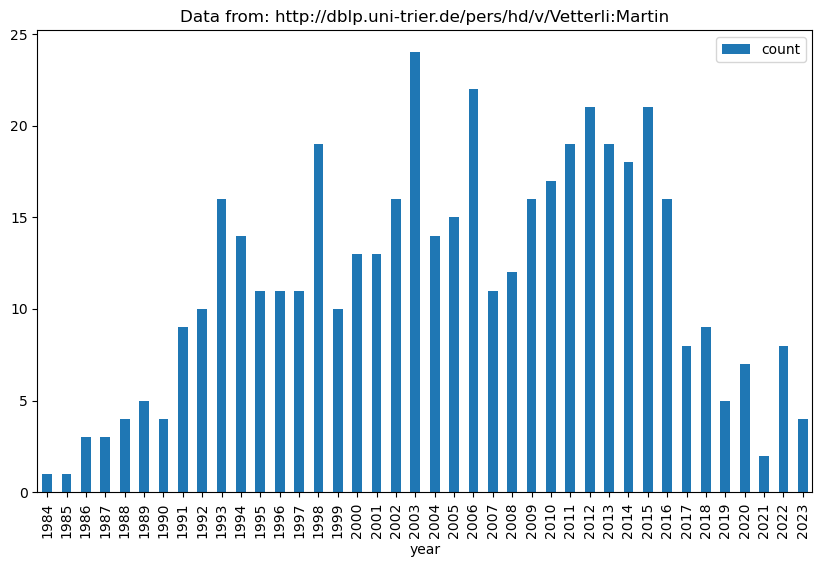

In [ ]:
publications.groupby('year')\
    .count()\
    .rename(columns = {'title':'count'})\
    .plot(y='count', kind='bar', grid=False, figsize=(10, 6), title='Data from: ' + URL)

### Data Visualisation

#### Data Visualisation Plot Types

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

#### Visualizing 1 Single Variable

##### Histogram `plt`

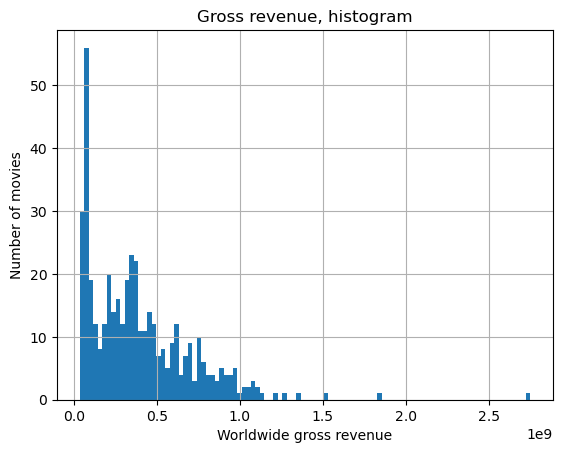

In [ ]:
#alternatively, we can use matplotlib directly
plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram')

##### Boxplot `plt`

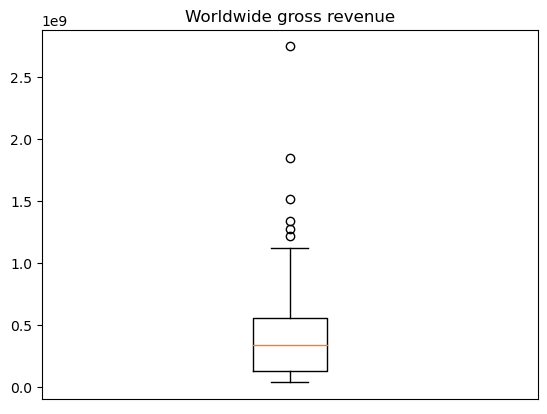

In [ ]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

#### Visualizing 2 Continuous Variables

##### Scatter Plot `plt`

Text(0, 0.5, 'IMDB rating')

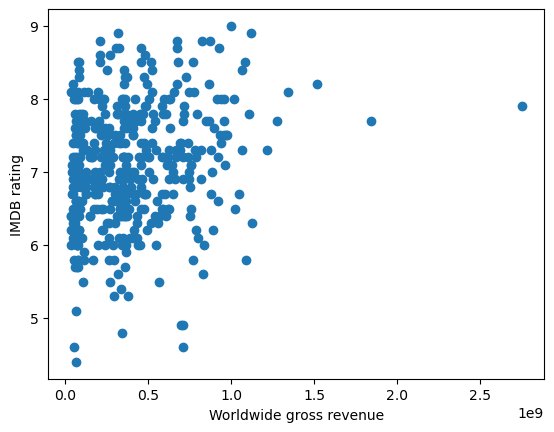

In [ ]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])
plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

Text(0, 0.5, 'IMDB rating')

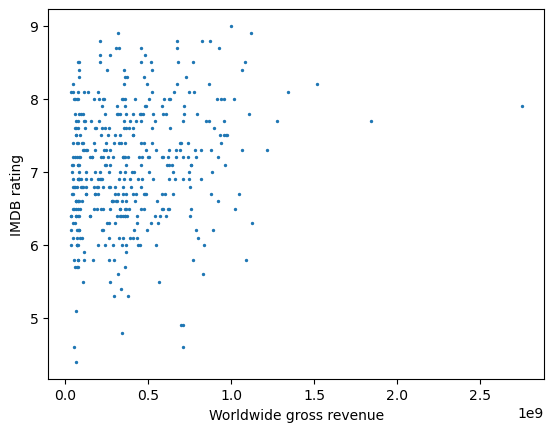

In [ ]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)
plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

##### Joint Plot `sns`

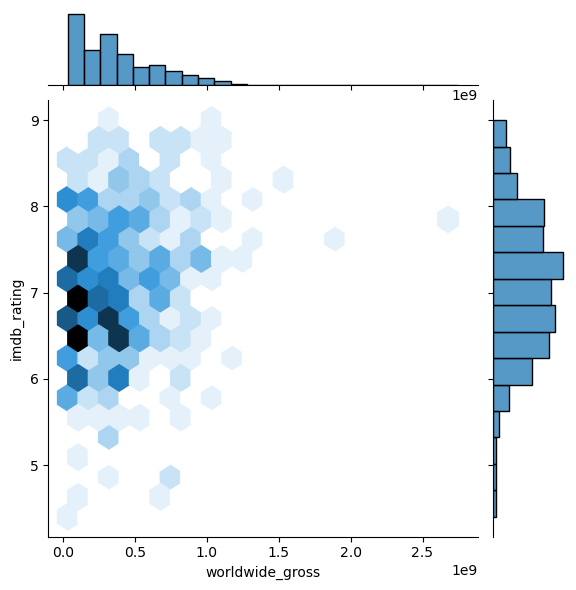

In [ ]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")

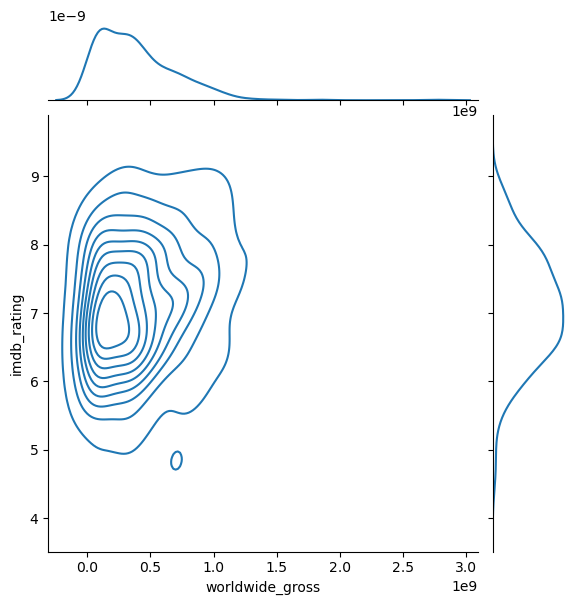

In [ ]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")


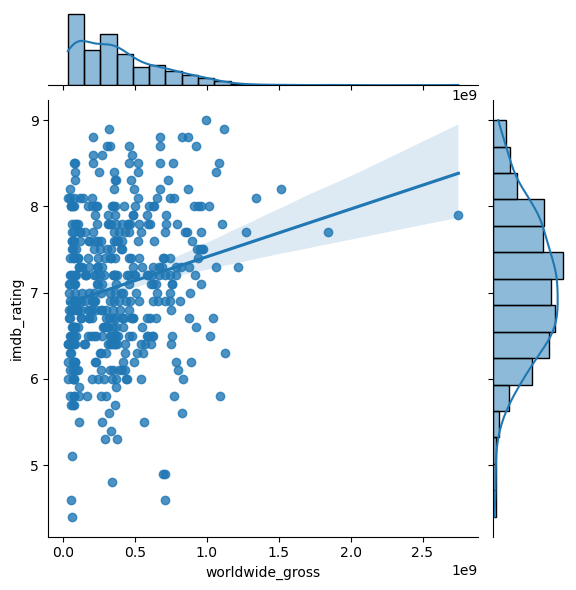

In [ ]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

#### Visualizing 2 Variables (1 Continuous and 1 Categorical)

##### Barplot `plt`

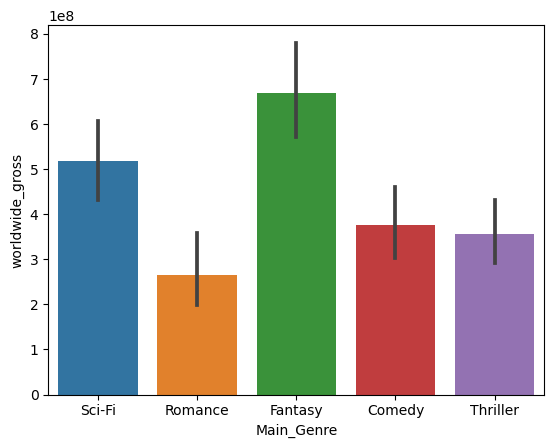

In [ ]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy','Fantasy','Sci-Fi','Romance'])])

##### Boxplot `plt`

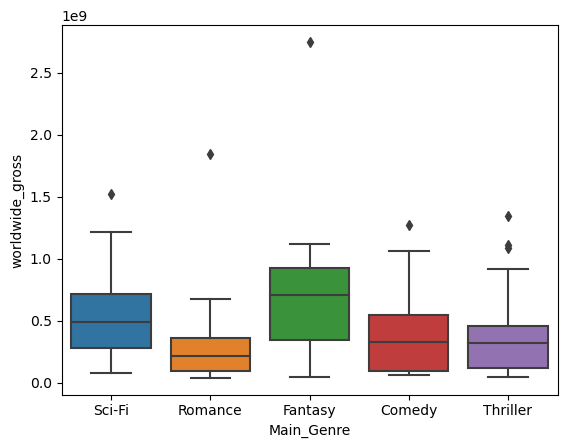

In [ ]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy','Fantasy','Sci-Fi','Romance'])])

##### Violinplot `plt`

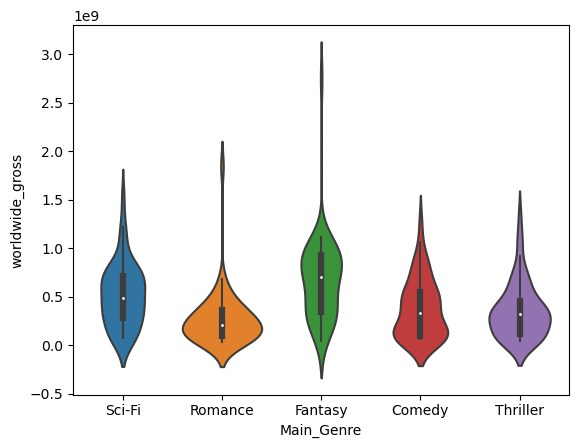

In [ ]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy','Fantasy','Sci-Fi','Romance'])])

#### Visualizing Uncertainty 

##### `Mean` & `Std` Computation

In [ ]:
# Calculate yearly stats across movies here
stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({
        'average_worldwide_gross': x['worldwide_gross'].mean(),
        'std_dev_worldwide_gross': x['worldwide_gross'].std()
    }))

##### Errorbar `plt`

Text(0, 0.5, 'Worldwide gross revenue')

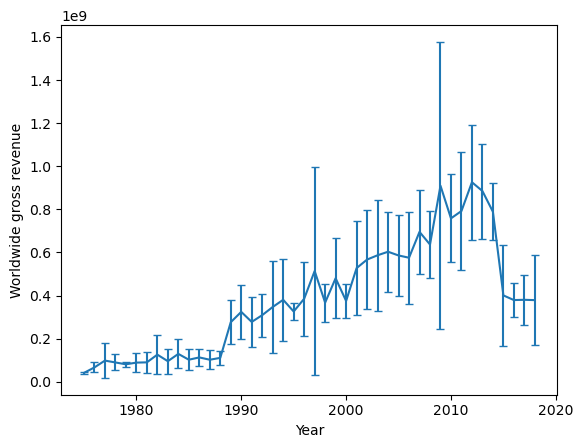

In [ ]:
# Write your code to make plot with errorbars here
plt.errorbar(stats_by_year.index, stats_by_year.average_worldwide_gross,
            yerr = stats_by_year.std_dev_worldwide_gross,
            capsize= 3)
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

##### Fill Between Plot `plt`

Text(0, 0.5, 'Worldwide gross revenue')

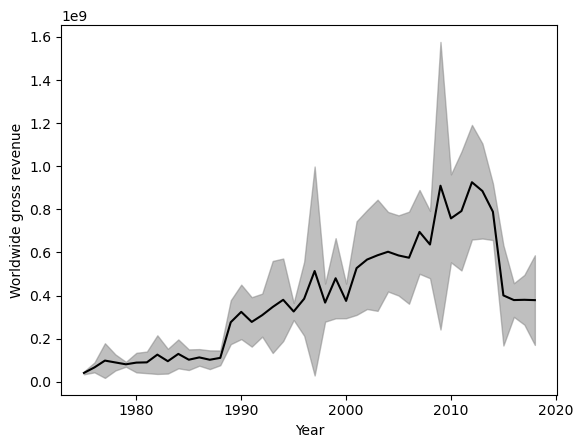

In [ ]:
# Write your code to make filled plot here
plt.fill_between(stats_by_year.index, stats_by_year.average_worldwide_gross - stats_by_year.std_dev_worldwide_gross,
                stats_by_year.average_worldwide_gross + stats_by_year.std_dev_worldwide_gross, alpha = 0.5, color = 'gray')
plt.plot(stats_by_year.average_worldwide_gross, color = 'black')
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

#### Visualizing Skewed Distributions

__A)__ Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now.

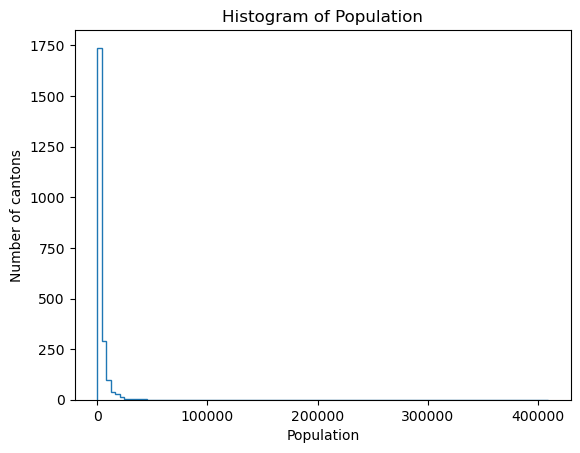

In [ ]:
#plot out the histogram of population Counts in December
plt.hist(pop_per_commune.population_Dec,bins=100,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons')
plt.xlabel('Population')
plt.show()

__B)__ A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a `log-log scale`: 

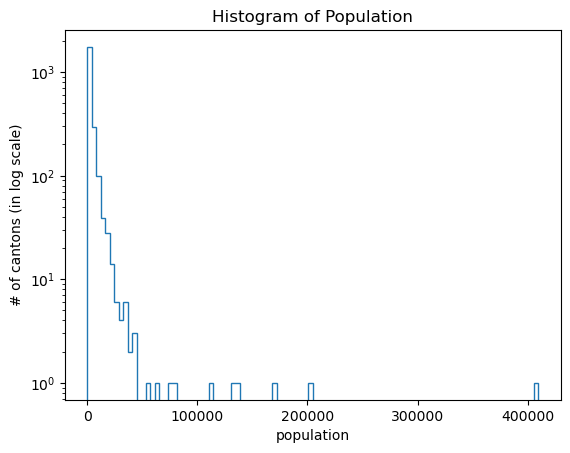

In [ ]:
array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

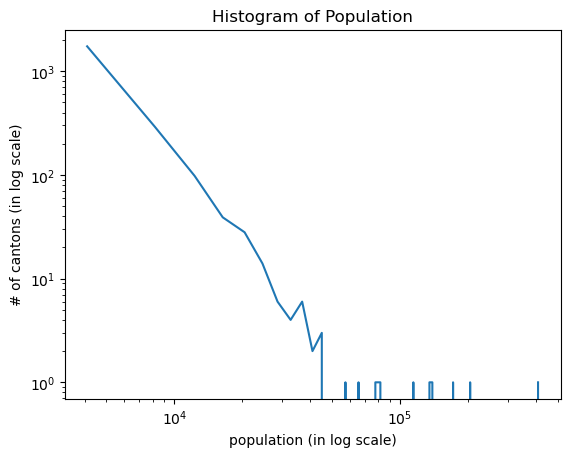

In [ ]:
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

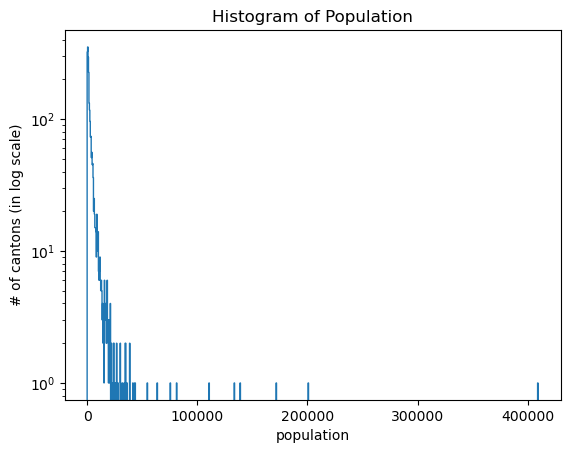

In [ ]:
array_1000 = plt.hist(pop_per_commune.population_Dec,bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

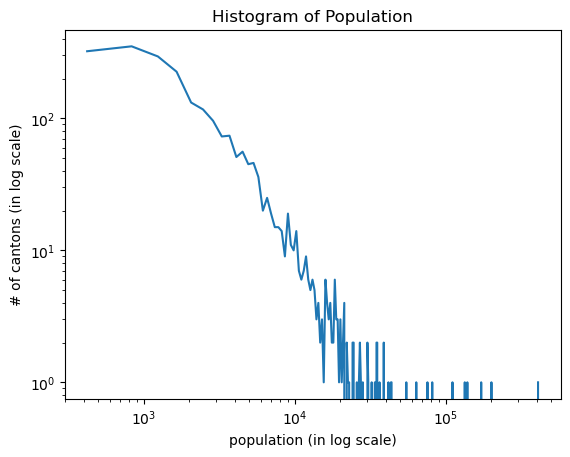

In [ ]:
plt.loglog(array_1000[1][1:],array_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

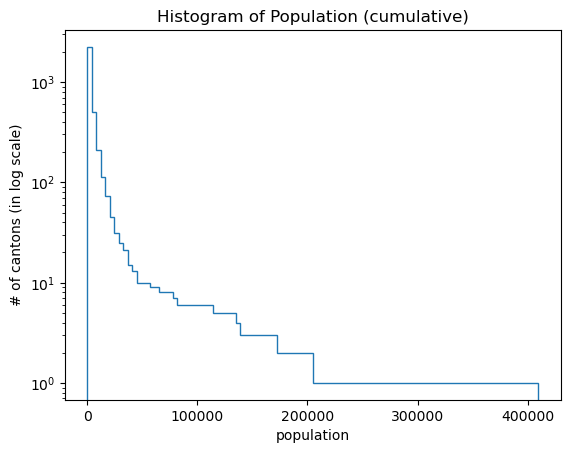

In [ ]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

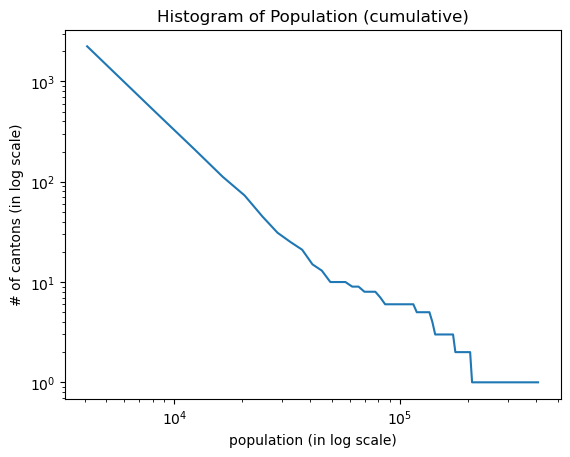

In [ ]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

#### Creating Panels with Subplot `plt`

In [ ]:
# Calculate stats by genre here
stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({'length': x['length'].values}))

Text(0, 0.6, 'Number of movies')

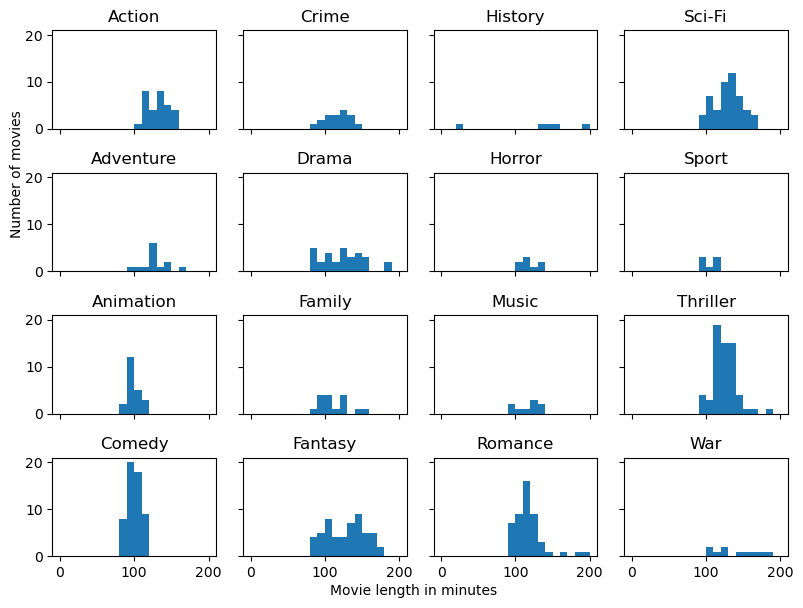

In [ ]:
# Write your code to make 4x4 panel here
import math

fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)
for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(stats_by_genre.iloc[i].values,range = [0,200],bins = 20)
    sbplt.set_title(stats_by_genre.index[i])
    
fig.tight_layout()
fig.text(0.4,0, "Movie length in minutes")
fig.text(0,0.6, "Number of movies", rotation = 90)

#### Creating Heatmaps `sns`

When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

<AxesSubplot:xlabel='studio', ylabel='Main_Genre'>

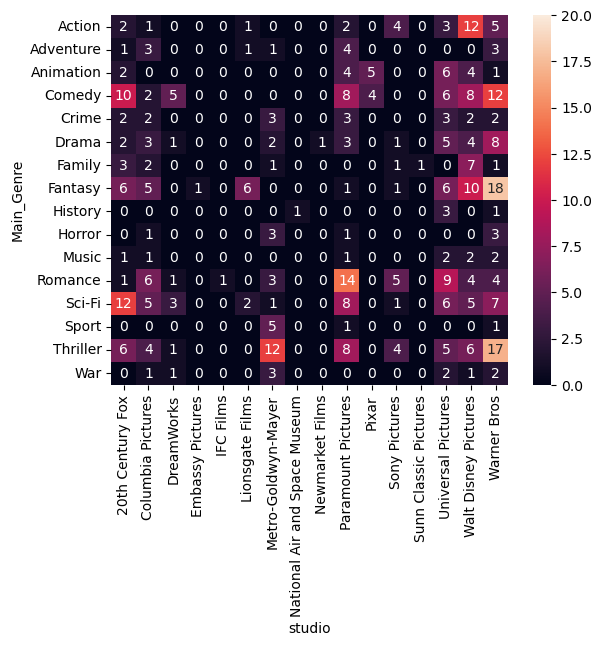

In [ ]:
# Write your code to make the first heatmap here
df2 = pd.crosstab(movies['Main_Genre'],movies['studio'])
sns.heatmap(df2, annot=True, vmin = 0, vmax = 20)

<AxesSubplot:xlabel='Genre_2', ylabel='Main_Genre'>

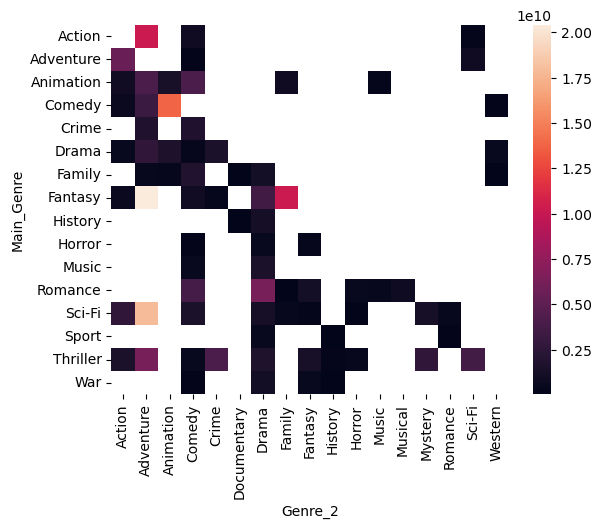

In [ ]:
# Write your code to make the second heatmap here
df3 = pd.crosstab(movies['Main_Genre'],movies['Genre_2'], values = movies['worldwide_gross'],
                    margins=False, aggfunc='sum')

sns.heatmap(df3, annot=False)

## 03 - Describing Data

### Statistical Libraries

Python libraries `statsmodels` and `SciPy` that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing.

In [ ]:
#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stat

### Descriptive Statistics

In [ ]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2628,48211,Texas,Hemphill,4115,2021,2094,33.0,64.0,1.0,0.4,...,2.4,0.7,3.8,17.6,1812,71.1,16.4,12.5,0.0,3.7
1801,35011,New Mexico,De Baca,2020,907,1113,45.1,50.2,0.0,0.0,...,2.8,2.1,7.4,12.7,619,66.2,25.5,8.2,0.0,5.2
32,1065,Alabama,Hale,15256,7183,8073,1.1,40.0,58.2,0.3,...,0.3,1.5,1.2,29.8,5282,76.3,17.6,5.8,0.3,13.3
2091,39097,Ohio,Madison,43456,23851,19605,1.6,89.3,5.8,0.4,...,1.2,1.1,3.9,24.9,18617,78.4,14.8,6.7,0.1,5.9
1732,31157,Nebraska,Scotts Bluff,36684,17699,18985,22.4,73.9,0.7,0.9,...,2.0,1.4,3.7,15.2,17970,79.7,12.9,7.2,0.2,5.5
988,20201,Kansas,Washington,5686,2885,2801,3.3,94.5,0.8,0.4,...,4.0,1.6,5.9,18.1,2950,72.4,16.7,10.4,0.4,3.1
30,1061,Alabama,Geneva,26815,13174,13641,3.6,84.0,8.7,0.3,...,0.9,1.8,3.4,25.8,10419,75.7,15.0,8.8,0.4,11.2
2742,48439,Texas,Tarrant,1914526,937266,977260,27.6,49.8,15.1,0.3,...,1.2,1.4,3.9,26.5,924741,83.1,11.4,5.4,0.1,6.9
1434,28067,Mississippi,Jones,68276,33051,35225,4.2,65.2,28.9,0.2,...,1.0,1.6,1.4,21.8,26436,75.9,18.6,5.4,0.1,7.4
2119,39153,Ohio,Summit,541847,262467,279380,1.8,78.6,14.2,0.2,...,1.4,0.5,2.9,22.9,258416,84.2,11.2,4.5,0.1,8.4


<AxesSubplot:>

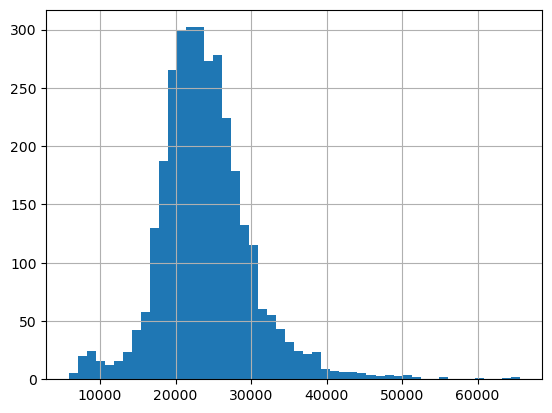

In [ ]:
df['IncomePerCap'].hist(bins = 50)

- Let's calculate basic descriptive statistics of the income per capita.

In [ ]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- **What distribution does the data come from?** Here is how we can test the goodness of the fit.

In [ ]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- *p_value < 0.05* -> we can reject the null hypothesis that the data comes from a normal distribution! (not a normal distribution then)

In [ ]:
# how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- *p_value < 0.05* -> not exponential either!

### Sample the Data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [ ]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [ ]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

198527.6
1645593.4


### Correlation between 2 Variables (`Pearson` & `Spearman`)

- Is income per capita of a county correlated with the unemployment?

In [ ]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

(0.2646136320394489, 9.942215354237806e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [ ]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SpearmanrResult(correlation=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank correlation is also significant.

### Measure Uncertainty

- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

(25000.0, 32000.0)

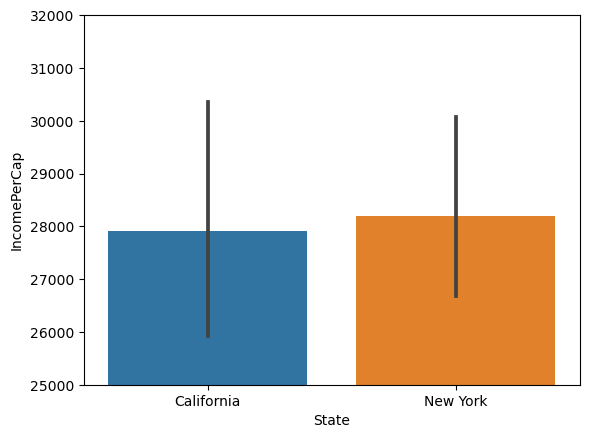

In [ ]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])

### Bootstrap Confidence Interval (Function)

Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [ ]:
def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.
    
    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate
    
    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    means = np.zeros(iterations)
    
    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(bootstrap_sample)
        
    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)
    
    return (lower_bound, upper_bound)

# Example usage:
data = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
print(bootstrap_confidence_interval(data))

(7.6, 14.6)


### Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [ ]:
# there is no clear association, very small positive correlation

Text(6.750000000000009, 0.5, 'Income per Capita [$]')

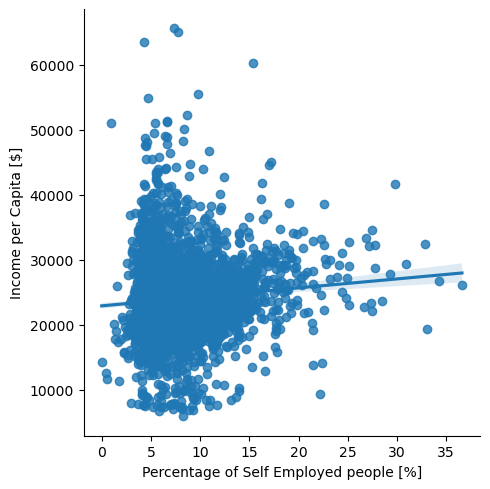

In [ ]:
import seaborn as sn

per_capita_self_empl = df[['State','IncomePerCap', 'SelfEmployed']]
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=per_capita_self_empl)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")

In [ ]:
print(stats.pearsonr(per_capita_self_empl['SelfEmployed'],per_capita_self_empl['IncomePerCap']))

(0.08727386609551788, 7.052861196521423e-07)


**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [ ]:
# weak negative association

(0.0, 22.0)

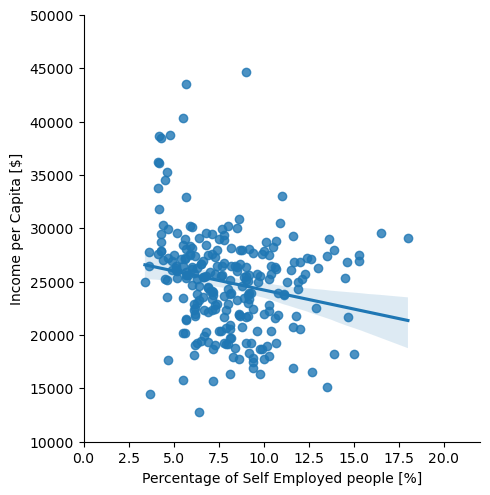

In [ ]:
SetA_per_capita_self_empl = per_capita_self_empl.query("State == 'Wisconsin' | \
                                                        State == 'Tennessee' | \
                                                        State == 'Minnesota' ") 

sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetA_per_capita_self_empl)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])

In [ ]:
print(stats.pearsonr(SetA_per_capita_self_empl['SelfEmployed'],SetA_per_capita_self_empl['IncomePerCap']))

(-0.202293507365215, 0.0011881639322139396)


**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [ ]:
# In Wisconsin, the nagative dependency is the strongest.

(0.0, 22.0)

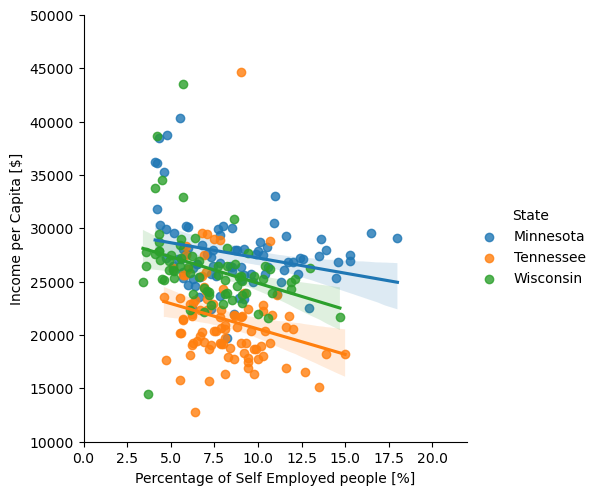

In [ ]:
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetA_per_capita_self_empl, hue = 'State')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])

In [ ]:
Wisconsin_per_capita_self_empl = SetA_per_capita_self_empl.query("State == 'Wisconsin'") 
Tennessee_per_capita_self_empl = SetA_per_capita_self_empl.query("State == 'Tennessee'") 
Minnesota_per_capita_self_empl = SetA_per_capita_self_empl.query("State == 'Minnesota'") 

print(stats.pearsonr(Wisconsin_per_capita_self_empl['SelfEmployed'],Wisconsin_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(Tennessee_per_capita_self_empl['SelfEmployed'],Tennessee_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(Minnesota_per_capita_self_empl['SelfEmployed'],Minnesota_per_capita_self_empl['IncomePerCap']))

(-0.32905300016378525, 0.004768134887745222)
(-0.23836048684913147, 0.02001163195552807)
(-0.2538551921654062, 0.01766519930091192)


**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

In [ ]:
# There is a weak negative dependency overall, moderate to strong positive when disaggregated.
# This is a Simpson’s Paradox: the effect is reversed when the data is aggregated.
# We would recommend in set B, not in set A (there is significant positive correlation within
# all states separately in set B).

(0.0, 25.0)

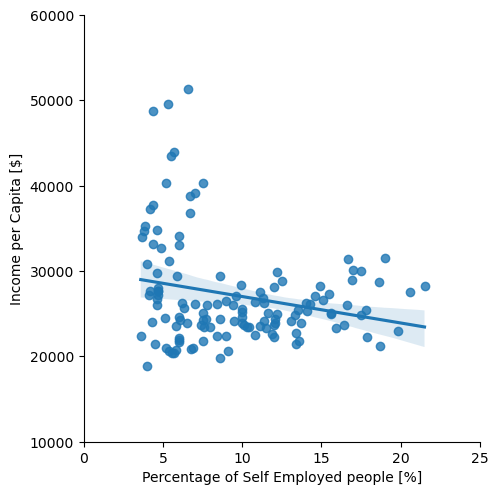

In [ ]:
SetB_per_capita_self_empl = per_capita_self_empl.query("State == 'New Jersey' | \
                                                        State == 'Kansas' | \
                                                        State == 'Rhode Island' ") 

sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetB_per_capita_self_empl)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,60000])
plt.xlim([0,25])

In [ ]:
print(stats.pearsonr(SetB_per_capita_self_empl['SelfEmployed'],SetB_per_capita_self_empl['IncomePerCap']))

(-0.2322214134608569, 0.007607493042857402)


(0.0, 25.0)

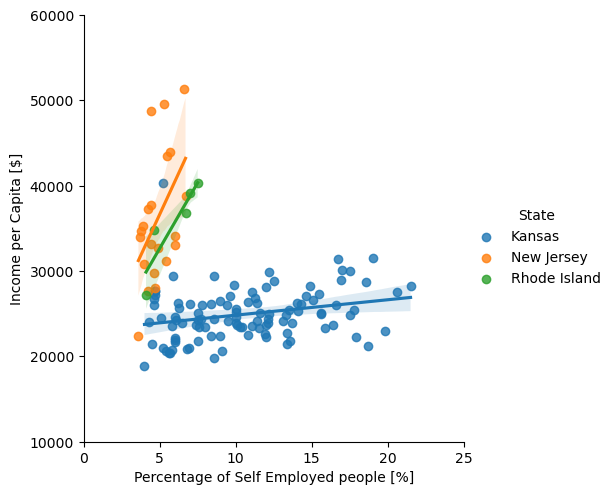

In [ ]:
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetB_per_capita_self_empl, hue = 'State')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,60000])
plt.xlim([0,25])

In [ ]:
NJ_per_capita_self_empl = SetB_per_capita_self_empl.query("State == 'New Jersey'") 
Kansas_per_capita_self_empl = SetB_per_capita_self_empl.query("State == 'Kansas'")
RI_per_capita_self_empl = SetB_per_capita_self_empl.query("State == 'Rhode Island'") 

In [ ]:
print(stats.pearsonr(NJ_per_capita_self_empl['SelfEmployed'],NJ_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(Kansas_per_capita_self_empl['SelfEmployed'],Kansas_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(RI_per_capita_self_empl['SelfEmployed'],RI_per_capita_self_empl['IncomePerCap']))

(0.48044784713362815, 0.027488944757806236)
(0.2581029971443692, 0.00785335184683246)
(0.9021788382149805, 0.03618310201575917)


### Exercise 2: Data visualization and read the stats comprehension and interpretation questions.

##### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

![boxplot](../img/boxplot.png)

In [ ]:
percentage = (25 - 20)/100
rep = percentage*7000
print(rep)

350.0


##### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

In [ ]:
# The correct answer: b) boxplot and histogram

##### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

In [ ]:
# Number of patients in the groundbreaking study
total_patients = 100

# Number of patients who reported improvements in the groundbreaking study
improved_patients = 28

# Probability of reporting feeling better under placebo
placebo_probability = 0.20

# Perform a one-sided binomial test
p_value = stats.binomtest(improved_patients, total_patients, placebo_probability, alternative='greater')

print("p-value:", p_value)

p-value: BinomTestResult(k=28, n=100, alternative='greater', statistic=0.28, pvalue=0.03415162963907485)


- The p-value (0.034) is less than the common significance level of 0.05 (5%).

- Since the p-value is smaller than 0.05, it suggests that the observed result (28 patients reporting improvements) is statistically significant.

- In this case, you have enough evidence to reject the null hypothesis.

- The null hypothesis, in this case, is that the new medicine's success rate is the same as the placebo's. With a p-value of 0.034, you have evidence to conclude that the new medicine's effect is significantly different from that of the placebo.

##### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

In [1]:
# The correct answer: c) Sampling 1000 height values with replacement and computing the mean.
# This is repeated 10000 times to create a sorted list of the 10000 means. 
# The CI is defined by the 250th and the 9750th value in sorted order.

#### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

In [ ]:
# The correct answer: a) There could be a positive Spearman’s correlation 
# between GPA and entry-level job salary in every single department of EPFL.
# This is known as Simpson's paradox, check out https://en.wikipedia.org/wiki/Simpson%27s_paradox

#### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

In [ ]:
# The correct answer: d) None of the above. The data is not necessarily heavy-tailed nor skewed, a signle outlier
# could shift the average.

## 04 - Regression Analysis


### Regression Analysis Libraries

In [ ]:
#load the libraries
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Linear Regression (OLS) `statsmodels`

- To get started with our model, we need two components:

   1. The equation describing the model
   2. The data
   
   
- Equations are specified using patsy formula syntax. Important operators are:
    1. `~` : Separates the left-hand side and right-hand side of a formula.
    2. `+` : Creates a union of terms that are included in the model.
    3. `:` : Interaction term.
    3. `*` : `a * b` is short-hand for `a + b + a:b`, and is useful for the common case of wanting to include all interactions between a set of variables.
    
- Intercepts are added by default.

- Categorical variables can be included directly by adding a term C(a). More on that soon!

- For (2), we can conveniently use pandas dataframe.

In [ ]:
# Declares the model: Ordinary Least Square Linear Regression (OLS)
mod = smf.ols(formula='time ~ C(diabetes) + C(high_blood_pressure)', data=df)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

# Print thes summary output provided by the library.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.097
Date:                Tue, 18 Oct 2022   Prob (F-statistic):            0.00254
Time:                        16:02:21   Log-Likelihood:                -1718.9
No. Observations:                 299   AIC:                             3444.
Df Residuals:                     296   BIC:                             3455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

#### Interpretation

- We interpret the model in the following way: days at hospital = 139 + 4.9 * diabetes - 31.8 * high blood pressure. Thus:
    1. People who don't have diabetes nor high blood pressure stay at the hospital on average for 139 days
    2. People who have diabetes, but don't have blood pressure stay for 139 + 4.9 days ~ 144 days
    3. People who don't have diabetes, but have blood pressure stay for 139 - 31 days ~ 108 days
    4. People who have diabetes and blood pressure stay for 139 + 4.9 - 31.8 ~ 112 days
    
- We calculate the means explicitly to make sure they are the same as what we just calculated with regression!

In [ ]:
print(df.loc[(df['diabetes'] == 0) & (df["high_blood_pressure"] == 0)]['time'].mean())
print(df.loc[(df['diabetes'] == 1) & (df["high_blood_pressure"] == 0)]['time'].mean())
print(df.loc[(df['diabetes'] == 0) & (df["high_blood_pressure"] == 1)]['time'].mean())
print(df.loc[(df['diabetes'] == 1) & (df["high_blood_pressure"] == 1)]['time'].mean())

139.0
144.8170731707317
108.25806451612904
111.46511627906976


- Isn't it strange that high blood pressure has a negative coefficient? It seems like the patients who have high blood pressure stay at the hospital for shorter number of days, even though one would expect the opposite. Lets' get to that!

### Linear Regression (OLS) with Interaction Terms `statsmodels`

- One reason why serious conditions can be associated with lower time spent at the hospital is because of a third confounding factor: death 💀. Patients who have a serious condition might spend less time at the hospital because they die.

- Let's get a better sense of what is happening by modeling the time spent at the hospital with death as a predictor.

- This time we will add interaction features.

In [ ]:
# we use a*b to add terms: a, b, a:b, and intercept
mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.32e-22
Time:                        16:02:21   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

- This model lets us see that death is associated with a lower number of days spent at the hospital.
- Notice how R2 is much larger compared to the previous model: more variance in the data is explained.
- Those that have high blood pressure stay for less time (-26 days on average), those who have blood pressure __and__ die spend 110 days less hospitalized on average, although this is not statistically significant.

### Logistic Regression (Binary Outcome) `statsmodels`

#### Standardization of Continuous Predictors 

In [ ]:
def standardize_columns(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()

# Example usage:
columns_to_standardize = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
standardize_columns(df, columns_to_standardize)

#### Logistic Regression Model

In [ ]:
# logit is logistic regression. The other parameters are the same as before

mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.2160
Time:                        16:02:21   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1633      0.362     -3.214      0.001   

#### Effect Visualization

In [ ]:
# feature names
variables = res.params.index

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

,0,1
Intercept,-1.872683,-0.453819
C(diabetes)[T.1],-0.431428,0.734243
C(high_blood_pressure)[T.1],-0.180976,1.018851
C(sex)[T.1],-1.086628,0.288599
C(anaemia)[T.1],-0.171894,1.007753
C(smoking)[T.1],-0.547629,0.818807
age,0.356256,0.968609
creatinine_phosphokinase,0.010320,0.553497
ejection_fraction,-1.177018,-0.487482
platelets,-0.379319,0.240561


In [ ]:
#sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

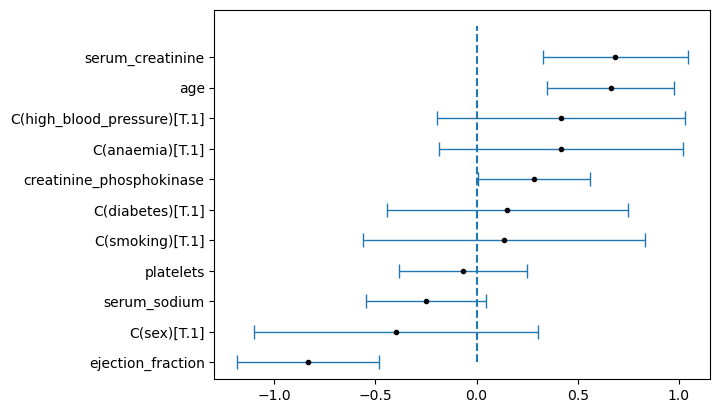

In [ ]:
#fancy plotting
plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
            linestyle = 'none',marker = 'o',markersize= 3,
            markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

- Serum creatinine level in the blood and age are significant positive predictors of death.
- High ejection fraction (a healthy heart) is a sigificant negative predictor of death.
- Since all predictors are standardized, we can interpret in the following way:
    - When all other predictors take mean values, an increase of age by 1 standard deviation, leads on average to an increase by 0.66 of log odds of death.
    - When all other predictors take mean values, increase of ejection fraction by 1 standard deviation, leads on average to a  decrease by 0.83 of log odds of death.

#### Interpreting log odds

- Why log odds? remember that that's what logistic regression models.
    - Notice that log odds are a bit difficult to interpret.
    - If an event has probability p, it has odds p/(1-p).
    - This is a non-linear transformation over p. See the plot below!

/var/folders/w2/r0gyc44j5b5bd6l08qvj5b140000gn/T/ipykernel_1142/4165489063.py:10: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(odds, np.log(odds))
/var/folders/w2/r0gyc44j5b5bd6l08qvj5b140000gn/T/ipykernel_1142/4165489063.py:15: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(p, np.log(odds))


Text(0, 0.5, 'log odds')

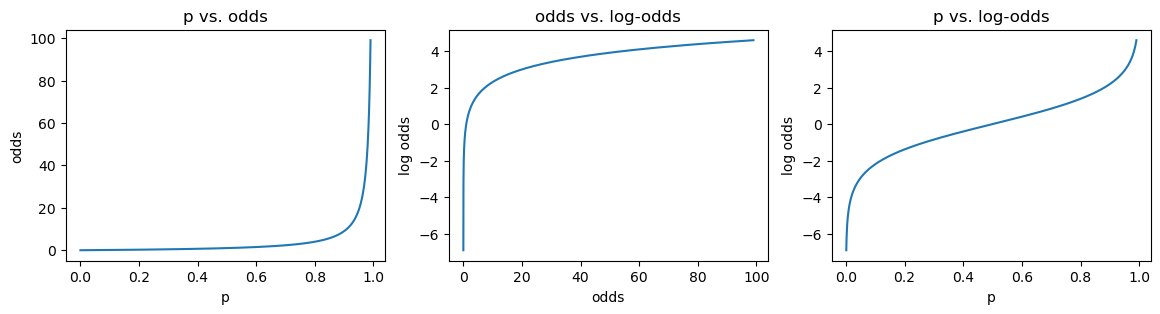

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14,3))
p = np.linspace(0, 0.99, 1000)
odds = p/(1-p)
axs[0].set_title("p vs. odds")
axs[0].plot(p, odds)
axs[0].set_xlabel("p")
axs[0].set_ylabel("odds")

axs[1].set_title("odds vs. log-odds")
axs[1].plot(odds, np.log(odds))
axs[1].set_xlabel("odds")
axs[1].set_ylabel("log odds")

axs[2].set_title("p vs. log-odds")
axs[2].plot(p, np.log(odds))
axs[2].set_xlabel("p")
axs[2].set_ylabel("log odds")

With this in mind, calculate:

1. If p = 0.1 and you have a change in log odds equals to +0.66, what will be your new p?

1. If p = 0.9 and you have a change in log odds equals to +0.66, what will be your new p?

In [ ]:
def p_to_log_odds(p):
    return np.log(p/(1-p))
def log_odds_to_p(odds):
    return np.exp(odds) / (1+ np.exp(odds))

In [ ]:
p_to_log_odds(0.1)

-2.197224577336219

In [ ]:
log_odds_to_p(-2.197224577336219)

0.10000000000000003

In [ ]:
odds = p_to_log_odds(0.1)
log_odds_to_p(odds + 0.66)

0.17693910183506342

In [ ]:
odds = p_to_log_odds(0.9)
log_odds_to_p(odds + 0.66)

0.9456909311361745

**Comment:** Notice that first increase of + 0.66 in log odds corresponds to roughtly a increase of ~7.7 percentage points! While the second increase corresponds to ~4.5 percentage points.

#### Log-transformations

Remember from class that a log transform in the dependent variable (y) makes the model multiplicative.

1. Fit a linear model to predict the time spent in the hospital (`time`) as a function of variables `high_blood_pressure`, `diabetes` and `DEATH_EVENT`.

2. Now perform a log transform in the variable `time`, that is, create another column in the dataframe containing the `log` of time. Repeat the model, now using the log of time as the dependent variable.

3. Calculate what is the _additive_ effect of having `high_blood_pressure` in the time spent in the hospital in the first model, and what is the _multiplicative_ effect of having `high_blood_pressure` in the second.

In [ ]:
mod = smf.ols(formula='time ~  high_blood_pressure + diabetes + DEATH_EVENT', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.69
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           6.12e-23
Time:                        16:02:21   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3350.
Df Residuals:                     295   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             164.5089    

In [ ]:
df["logtime"] = np.log(df["time"])
mod = smf.ols(formula='logtime ~  high_blood_pressure + diabetes + DEATH_EVENT', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                logtime   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     55.05
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.75e-28
Time:                        16:02:21   Log-Likelihood:                -325.52
No. Observations:                 299   AIC:                             659.0
Df Residuals:                     295   BIC:                             673.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.9891    

**Comment:** In the first model, `high_blood_pressure` is associated with an additive coefficient of around -25. Thus, in the model, whenever a patient has high blood pressure we deduce -25 days out of the prediction.
In the second model, `high_blood_pressure` is associated with an multiplicative coefficient of around -0.22. This means that, in the model, whenever a patient has high blood pressure we multiply his or her outcome by $e^{-0.22} \simeq 0.80$. 



## 05 - Causal Analysis of Observational Data

### Naive Analysis

In [ ]:
lalonde_data = pd.read_csv(DATA_FOLDER + 'lalonde.csv')
lalonde_data.sample(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
573,PSID389,0,18,11,1,0,0,1,0.00000,0.0000,7146.286
594,PSID410,0,42,16,0,0,0,0,0.00000,0.0000,23764.800
333,PSID149,0,51,12,0,0,0,0,20742.76000,2538.6770,1019.631
69,NSW70,1,29,13,1,0,0,0,0.00000,0.0000,7479.656
523,PSID339,0,26,9,0,1,0,1,1563.49500,0.0000,2862.356
549,PSID365,0,16,8,0,0,0,1,0.00000,0.0000,2559.422
124,NSW125,1,18,11,0,0,0,1,3678.23100,919.5579,4321.705
354,PSID170,0,21,14,0,0,0,0,80.32994,1890.5810,6389.690
343,PSID159,0,28,12,1,0,0,0,6285.32800,2255.8060,7310.313
592,PSID408,0,46,11,1,0,1,1,0.00000,0.0000,0.000


Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers. What might a naive "researcher" conclude from this superficial analysis?

In [ ]:
treated = lalonde_data.loc[lalonde_data['treat'] == 1] # People that attained the programme
control = lalonde_data.loc[lalonde_data['treat'] == 0] # People that didn't attain the programme

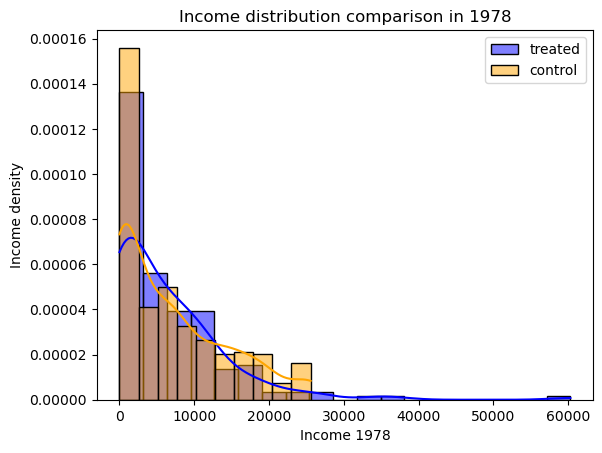

In [ ]:
ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Income distribution comparison in 1978',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

The treated group has:
1. lower mean earnings value
2. higher first (25%) percentile - low income interval (though)
3. Some outliers of really high income rates - with maximum income

The control group has:
1. higher mean earnings value
2. higher percentile (50%,75%)
3. higher number of people with income in the interval 12000 - 27000

We conclude that, in general, the control group outperforms the treated one in most of the cases.

### Propensity Score Model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `statsmodels` to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).

*Note:* you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.

In [ ]:
def standardize_columns(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()

# # let's standardize the continuous features:
columns_to_standardize = ['age', 'educ', 're74', 're75']
standardize_columns(lalonde_data, columns_to_standardize)

In [ ]:
mod = smf.logit(formula='treat ~  age + educ + C(black) + C(hispan)  + C(married) + C(nodegree) + \
                +re74 + re75', data=lalonde_data)

res = mod.fit()
print(res.summary())

# Extract the estimated propensity scores
lalonde_data['Propensity_score'] = res.predict()

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.3508
Time:                        11:11:36   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8509      0.350     -8.147      0.000      -3.537      -2.165
C(black)[T.

### Propensity Score Matching (Balancing the Dataset 1)

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
Use the `networkx` package in Python for predefined matching functions

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

In [ ]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In order to perform matching between pairs, a distance/similarity function is needed. Since the library used for the matching `networkx` has a function that maximizes the sum of weights between pairs, it is natural to use a function that measures similarity. Wanting to minimize the difference of propensity scores between pairs, we define the similarity function between two instances $x$ and $y$ like:

$$ similarity(x,y) = 1 - | propensity\_score(x) - propensity\_score(y) |$$

This function captures the difference in scores like a distance, but since the distance defined like that would always be between 0 and 1, subtracting it from 1 would be a meaningful measure to use for similarity.

In [ ]:
# Separate the treatment and control groups
treatment_df = lalonde_data[lalonde_data['treat'] == 1]
control_df = lalonde_data[lalonde_data['treat'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [ ]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_1 = lalonde_data.iloc[matched]
display(matched)

[14,
 341,
 1,
 145,
 120,
 243,
 21,
 278,
 77,
 444,
 35,
 139,
 208,
 169,
 582,
 357,
 184,
 232,
 189,
 22,
 182,
 32,
 172,
 280,
 111,
 76,
 17,
 363,
 142,
 18,
 47,
 137,
 12,
 595,
 105,
 128,
 558,
 564,
 70,
 95,
 41,
 7,
 607,
 9,
 43,
 81,
 130,
 540,
 181,
 161,
 144,
 56,
 0,
 151,
 58,
 570,
 162,
 124,
 36,
 402,
 57,
 165,
 82,
 11,
 119,
 475,
 2,
 560,
 146,
 412,
 573,
 84,
 34,
 75,
 54,
 31,
 559,
 68,
 517,
 67,
 282,
 96,
 572,
 39,
 117,
 112,
 178,
 59,
 565,
 10,
 152,
 159,
 180,
 154,
 166,
 576,
 69,
 88,
 37,
 115,
 89,
 44,
 171,
 114,
 129,
 27,
 86,
 176,
 179,
 6,
 123,
 138,
 585,
 136,
 99,
 133,
 294,
 51,
 250,
 371,
 415,
 174,
 311,
 125,
 556,
 38,
 410,
 275,
 155,
 529,
 42,
 61,
 600,
 48,
 141,
 366,
 538,
 343,
 344,
 109,
 215,
 440,
 583,
 100,
 324,
 590,
 452,
 318,
 552,
 24,
 380,
 345,
 103,
 183,
 584,
 360,
 270,
 302,
 135,
 528,
 459,
 571,
 592,
 127,
 484,
 515,
 389,
 514,
 253,
 211,
 462,
 33,
 281,
 535,
 477,
 122,
 225

### Propensity Score Matching (Balancing the Dataset 2)

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 1.

In [ ]:
treatment_df = lalonde_data[lalonde_data['treat'] == 1]
control_df = lalonde_data[lalonde_data['treat'] == 0]


G = nx.Graph()

for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Adds an edge only if the individuals have the same race
        if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan']):
            similarity = get_similarity(control_row['Propensity_score'],
                                        treatment_row['Propensity_score'])

            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

matching = nx.max_weight_matching(G)

In [ ]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_all = lalonde_data.iloc[matched]

### Less Naive Analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in `Naive Analysis`, but now only for the matched dataset you've obtained from part 2.
What do you conclude about the effectiveness of the job training program?

In [ ]:
treated = balanced_df_all.loc[balanced_df_all['treat'] == 1] #People that attained the program
control = balanced_df_all.loc[balanced_df_all['treat'] == 0] #People that didn't attain the program

In [ ]:
treated.re78.describe()

count      116.000000
mean      6375.738003
std       6670.986821
min          0.000000
25%        758.102600
50%       4648.736000
75%      10160.440000
max      36646.950000
Name: re78, dtype: float64

In [ ]:
control.re78.describe()

count      116.000000
mean      5095.456025
std       6047.014862
min          0.000000
25%          0.000000
50%       2256.488500
75%       8942.092750
max      20243.380000
Name: re78, dtype: float64

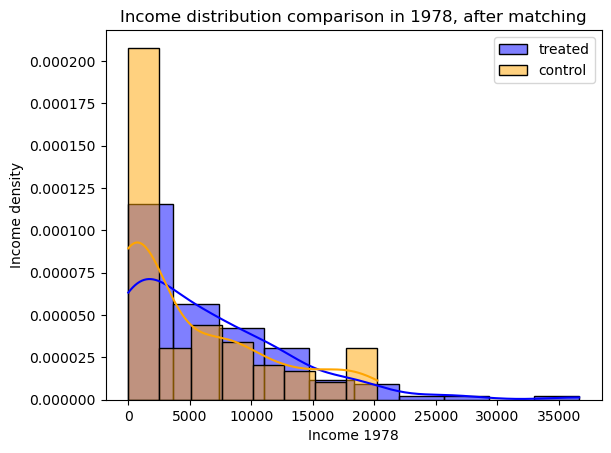

In [ ]:
ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated');
ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Income distribution comparison in 1978, after matching',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

# Final conclusion: after the propensity score matching, the results drastically change and support the 
# positive effect of the training program.

## 06 - Learning from Data - Supervised Learning

### Machine Learning Libraries

In this exercise we will learn how to use `scikit-learn` to train `Linear Regression`, `K-NN` and `Logistic Regression` models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
%matplotlib inline

### Linear Regression `scikit-learn`

#### Theory: Learning Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="../img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="../img/slope_intercept.png">

#### Implementation with `scikit-learn`

**Scikit-learn** provides an easy way to train the model:

In [ ]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

Back to the theory! Let's see what the formula looks like:

In [ ]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.04576464545539761 * TV + 
0.18853001691820462 * radio + 
-0.0010374930424763159 * newspaper + 
2.9388893694594067




$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

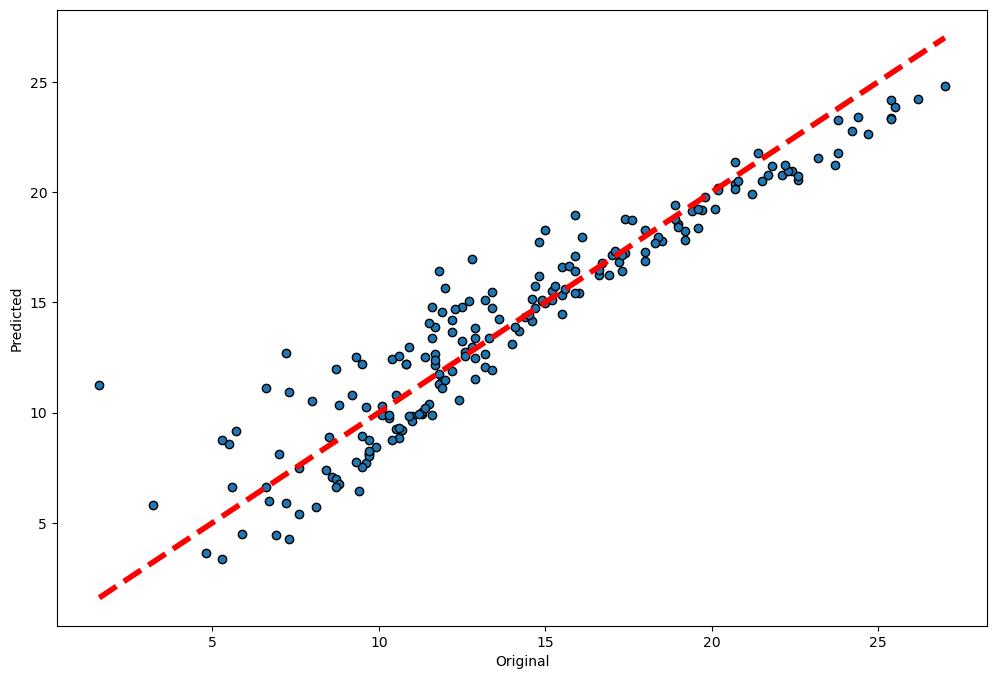

In [ ]:
lr = LinearRegression()
# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation:
y_predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, y_predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

- Print the **MSE** :

In [ ]:
mean_squared_error(y, y_predicted)

3.0729465971002106

#### Ridge Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model.

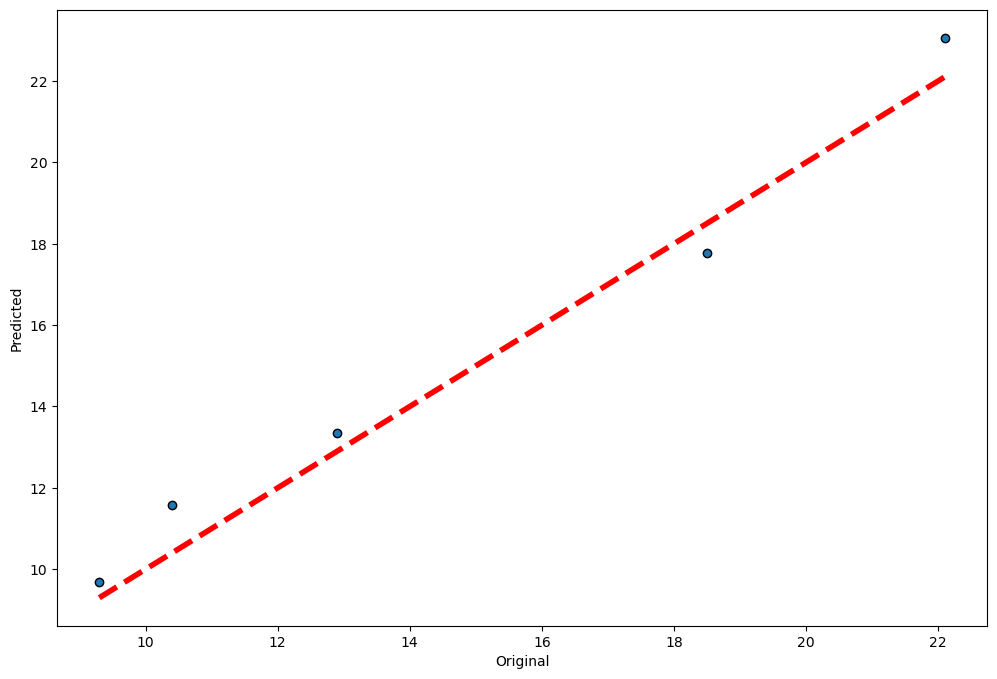

In [ ]:
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation:
y_predicted_r = cross_val_predict(ridge, X, y, cv=5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, y_predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

- Print the **MSE** :

In [ ]:
mean_squared_error(y, y_predicted_r)

0.6442462580572467

### Logistic Regression `scikit-learn`

#### Feature Vector Preparation

Let's use the data obtained by the _Encyclopedia Titanica_ to predict if a passenger survived the Titanic disaster. What are the **features**?
- name: Name of the passenger
- sex: Male or Female
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Ticket price
- cabin: Cabin number
- embarked: Port of Embarkation

What is the **response**?
- survived: whether the passenger survived the disaster or not

In [ ]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(survived), len(dead)))
print("Survived {:.2%}".format(len(survived)/len(titanic)))

Survived 500, Dead 809
Survived 38.20%


In [ ]:
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']

The dataset contains one categorical variable: sex (male|female). We need to convert it to a numerical variable. Pandas offers the method `get_dummies` that takes care of this:

In [ ]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
y = titanic['survived']
X.head()

,age,sibsp,parch,fare,sex_female,sex_male
0,29.0000,0,0,211.3375,True,False
1,0.9167,1,2,151.5500,False,True
2,2.0000,1,2,151.5500,True,False
3,30.0000,1,2,151.5500,False,True
4,25.0000,1,2,151.5500,True,False


#### Training and Evaluating the Model

In [ ]:
logistic = LogisticRegression(solver='lbfgs')
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

Precision: 0.72 (+/- 0.13)
Recall: 0.68 (+/- 0.16)


Logistic regression uses a **threshold** on the probability to decide at which class to assign a prediction. In some cases, we are interested to understand how the model behaves at different levels of this **threshold**. Let's give a look at the `ROC curve`  ([link](https://en.wikipedia.org/wiki/Receiver_operating_characteristic))

In [ ]:
# Predict the probabilities with a cross validation
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

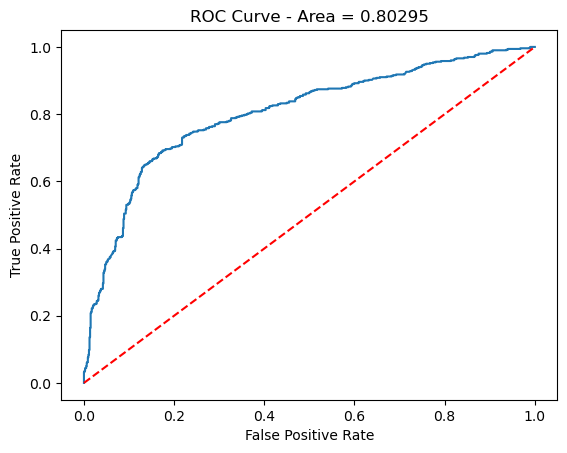

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));

#### Exploring the Model Predictions

In [ ]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X.values, y)

LogisticRegression()

In [ ]:
X.columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male'], dtype='object')

- Would a man, 25 years old without relative onboard, and with a fare of 100 survive?

In [ ]:
test = [25, 0, 0, 100, 0, 1]
"YES" if logistic.predict([test])[0] > 0 else "NO"

'NO'

- What is the probability distribution behind this prediction?

In [ ]:
logistic.predict_proba([test])

array([[0.5528599, 0.4471401]])

- What about a woman, 35 years old, alone onboard and with the same fare?

In [ ]:
test = [35, 0, 0, 100, 1, 0]
"YES" if logistic.predict([test])[0] > 0 else "NO"

print(logistic.predict_proba([test])[0])

[0.11464109 0.88535891]


### K-Nearest Neighbors (K-NN) `scikit-learn`

Let's create some complex shapes to observe how K-NN behaves.

Text(0.5, 1.0, 'Circles')

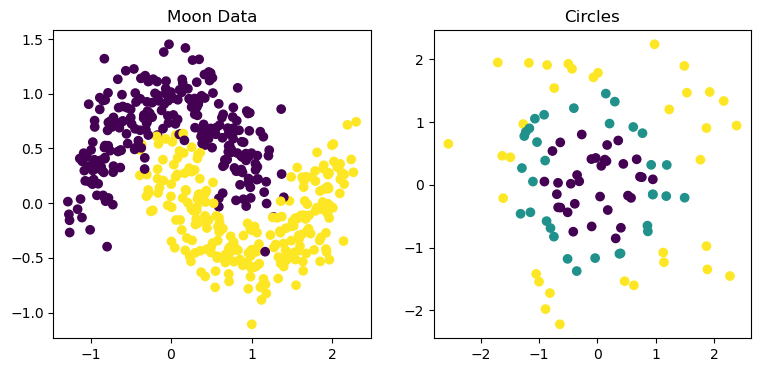

In [ ]:
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')

Plotting function to predict the class of different areas of the features space.

In [ ]:
# Plotting helper 
# Source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

Create the models for both dataset with K=1 and K=15.

In [ ]:
# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

KNeighborsClassifier(n_neighbors=15)

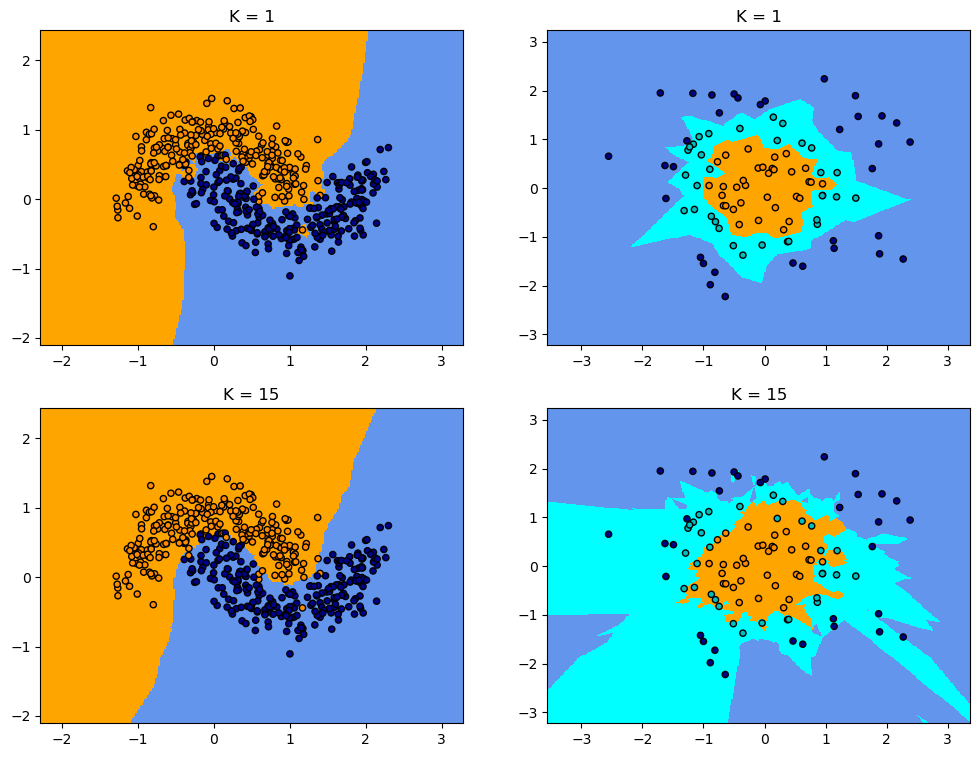

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)

### Exercises

#### Question 1: Which of the following classification models fulfills all three characteristics: i) it is the quickest to train, ii) it is able to handle complex decision boundaries, and iii) it doesn’t require additional retraining to make predictions that take into account freshly obtained data points?

 - a) logistic regression
 - **b) k nearest neighbors**
 - c) random forest
 - d) deep neural network
 
Answer: b)

#### Question 2: A logistic regression model...

 - a) is trained by minimizing the least-squares error
 - **b) makes predictions in the range [0,1]**
 - c) makes predictions in the range [0,+inf] 
 - d) Can perfectly separate white from gray dots as a linear function of x = [x1, x2]  when x1, x2 ∈ {0, 1} and y = x1 XOR x2, as in the following picture: 

<img src="../img/q4.png" width="250">

Answer: b)

#### Question 3: Train a Random Forest model to predict the if a passenger of Titanic survived.

- Use random forest classifier with max tree depth of 3 (and random_state=0)
- Train the classifier by variating the number of trees from 1 to 20 (N)
- For each step estimate precision/recall with cross validation (10-folds)
- Plot 2 curves for different values of N

In [ ]:
# Load the data
titanic = pd.read_excel('data/titanic.xls')
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [n for n in range(1, 21)]
precision_scores = []
recalls_scores = []


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=10, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
    recalls_scores.append(recall.mean())

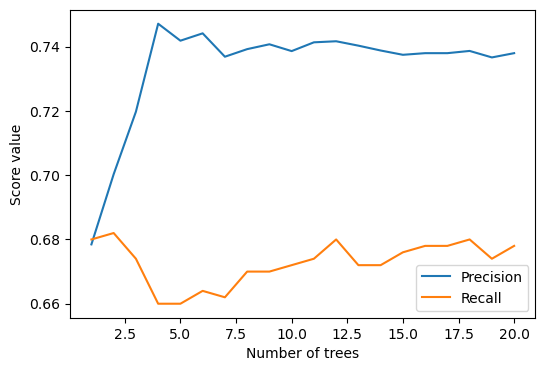

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()

## 07 - Learning from Data - Applied Machine Learning

## 08 - Learning from Data - Unsupervised Learning

## 09 - Handling Text

## 10 - Handling Networks